<a href="https://colab.research.google.com/github/dsevero/generative-models/blob/master/experiments/variational-inference/notebooks/Variational_Lower_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this cell we define some LaTeX `\newcommand`s (they will remain invisible.)

$$\newcommand{\xn}{x^{(n)}}$$
$$\newcommand{\zn}{z^{(n)}}$$
$$\newcommand{\norm}{\mathcal{N}}$$
$$\newcommand{\lp}{\left(}$$
$$\newcommand{\rp}{\right)}$$

The objective of this notebook is the **study methods for maximizing the Evidence Lower Bound**. Consider the following probabilistic graphical model consisting of one observed continuous variable $x$ and another hidden discrete variable $z$.

We assume a true joint density  (which we **do not** have acess to)

$$t(x,z) = t(x|z)t(z) = \norm(x; \mu_z, \sigma^2)t(z) $$

which implies a gaussian mixture on the marginal density of $x$, 

$$t(x) = \sum_z\norm(x; \mu_z, \sigma^2)t(z)$$


What we have access to are $N$ samples of $t(x)$ in the form of a vector $D = \left\{x^{(n)}\right\}_{n=1}^N$

In [1]:
!pip install --upgrade --quiet autograd
!pip install --quiet scipy==1.1.0 # needed for autograd compatibility
!pip freeze | grep -E "^autograd==|^pandas==|^numpy==|^scipy=="

autograd==1.2
numpy==1.16.4
pandas==0.24.2
scipy==1.1.0


In [0]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

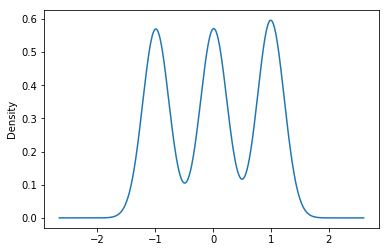

In [3]:
def sample_mixture(locs, scales=None, prior_weights=None, n_samples=1):
    
    locs = np.array(locs)
    
    # handle default values
    scales = np.array(scales) if scales else np.ones_like(locs)
    prior_weights = prior_weights or np.ones_like(locs)
    
    # compute prior probabilities from prior_weights
    prior_probs = np.array(prior_weights)/np.sum(prior_weights)
    
    # sample mixture classes
    indices = np.arange(locs.shape[0])
    indices_samples = np.random.choice(indices, size=n_samples, p=prior_probs)
    return pd.Series(locs[indices_samples] + 
                     scales[indices_samples]*stats.norm().rvs(n_samples))


x_samples = sample_mixture([-1, 0, 1], scales=3*[0.1], n_samples=1_000)
x_samples.plot.kde();